### Tests de entrenamiento para el conjunto de datos IRIS 

Importamos todas las librerias y modulos necesarios

In [1]:
from Neural_Network.layer import Layer
from data.load_data import load_iris_data,load_mnist_data
from Neural_Network.neural_network import NeuralNetwork
from sklearn.model_selection import train_test_split
from Neural_Network.preprocessing import preprocess_datairis,preprocess_datamnist
from Neural_Network.activations import softmax, softmax_derivate, relu, relu_derivate
from Neural_Network import optimizers
import numpy as np
from Neural_Network.plots import plot_confusion_matrix

Cargamos los datos de iris y preprocesamos los datos

In [2]:
X, y = load_iris_data() 
X, y = preprocess_datairis(X, y.reshape(-1, 1))

Dividimos los datos en conjuntos de entrenamiento y prueba

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Inicializamos la red neuronal y agregamos capas a esta

In [4]:
nn = NeuralNetwork()
nn.set(Layer(4, 5, activation=relu, activation_derivate=relu_derivate))
nn.set(Layer(5, 3, activation=softmax, activation_derivate=softmax_derivate))

Evaluamos la precisión antes y después de entrenar la red neuronal

In [5]:
print("accuracy before training: ", NeuralNetwork.accuracy(y_test, [nn.feedfoward(x) for x in X_test]))
(acc1, loss1) = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)
print("accuracy after training: ", NeuralNetwork.accuracy(y_test, [nn.feedfoward(x) for x in X_test]))

accuracy before training:  0.4
epoch   0 - Loss 0.21215, Accuracy 0.58333
epoch  10 - Loss 0.06296, Accuracy 1.00000
epoch  20 - Loss 0.02432, Accuracy 0.95833
epoch  30 - Loss 0.01283, Accuracy 0.95833
epoch  40 - Loss 0.00855, Accuracy 0.95833
epoch  50 - Loss 0.00616, Accuracy 0.95833
epoch  60 - Loss 0.00469, Accuracy 0.95833
epoch  70 - Loss 0.00371, Accuracy 0.95833
epoch  80 - Loss 0.00303, Accuracy 0.95833
epoch  90 - Loss 0.00254, Accuracy 0.95833
epoch 100 - Loss 0.00217, Accuracy 0.95833
epoch 110 - Loss 0.00188, Accuracy 0.95833
epoch 120 - Loss 0.00165, Accuracy 0.91667
epoch 130 - Loss 0.00146, Accuracy 0.91667
epoch 140 - Loss 0.00129, Accuracy 0.91667
epoch 150 - Loss 0.00115, Accuracy 0.91667
epoch 160 - Loss 0.00103, Accuracy 0.91667
epoch 170 - Loss 0.00093, Accuracy 0.91667
epoch 180 - Loss 0.00084, Accuracy 0.91667
epoch 190 - Loss 0.00077, Accuracy 0.91667
epoch 200 - Loss 0.00070, Accuracy 0.91667
epoch 210 - Loss 0.00064, Accuracy 0.91667
epoch 220 - Loss 0.0005

Hacemos la matriz de confusión

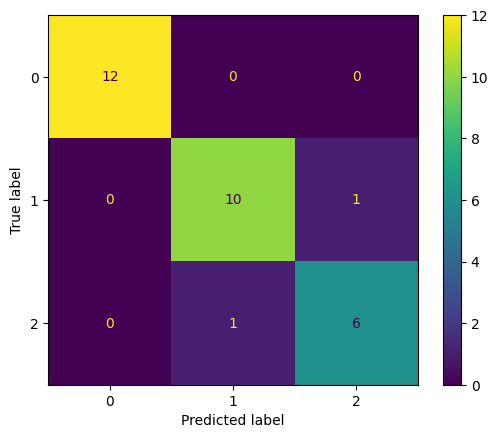

In [6]:
y_pred = [nn.feedfoward(x) for x in X_test]
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
plot_confusion_matrix(y_test, y_pred)

### Test de entrenamiento para el conjunto de datos MNIST

In [7]:
X, y = load_mnist_data()
X, y = preprocess_datamnist(X, y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

nn = NeuralNetwork()
nn.set(Layer(784, 128, activation=relu, activation_derivate=relu_derivate))  # Primera capa
nn.set(Layer(128, 64, activation=softmax, activation_derivate=softmax_derivate))  # Capa de salida

print("accuracy before training: ", NeuralNetwork.accuracy(y_test, [nn.feedfoward(x) for x in X_test]))
(acc1, loss1) = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=10, learning_rate=0.01)
print("accuracy after training: ", NeuralNetwork.accuracy(y_test, [nn.feedfoward(x) for x in X_test]))

accuracy before training:  0.09571428571428571
epoch   0 - Loss 2.12338, Accuracy 0.15598


KeyboardInterrupt: 